# Characterizing Clinical Text Using Clinical LLM Latent Representations

Summer 2023
SULI Internship: Ifrah Khurram
LBNL Mentors: Rafael Zamora-Resendiz, Silvia Crivelli Ph.D.

## Overview
This notebook serves as a tool to interact with large language model (LLM) embeddings of MIMIC-IV discharge reports.
For this exploratory work, we analyze 12-different LLM model embeddings (of varied model size, input length, and
pretraining strategies) for 331,793 unique discharge reports existing in MIMIC-IV.
For the time being, we have not explored the 2,299,451 unique radiology reports found in MIMIC-IV as well.
The notebooks implements python code for loading the corpus embeddings precomputed on NERSC's Perlmutter,
loading K-Means cluster centroid distances for each latent space, and UMAP reduced (x, y) coordinates for 
each embedding. Additionally, visualizations of each latent space is explored too.

## Purpose of Research
With increased interest in employing LLMs for clinical NLP, there is a need for understanding
how LLMs organize medical information and if the manner corpuses are respresented internally in 
an LLM is correlated with structured medical variables used in clinical decision making. 
Current state-of-the-art (SOTA) models continue to show improved performance on NLP by scaling
LLM development to larger model sizes and pretraining corpuses. Even so, clinical LLMs still are
catching up to the results shown for LLM trained on general internet corpuses in terms of scale.
This work takes a look at contemporary clinical LLMs and focuses on developing methods to assess the
clustering quality of LLM latent space w.r.t patient age, sex, race, life expectancy, fraility and
clinical phenotypes.

## Precomputing LLM Embeddings, KMeans Clusters, & UMAP 2D

LLM inference was benchmarked and scaled on NERSC's Perlmutter. The table of benchmarking results can be found 
[here](https://github.com/CrivelliLab/OSA_Phenotyping_LLMs/tree/main#project-api). Each LLM was tested to 
see how many corpus documents can be embedded on the NVidia A100 GPUs hosted on Perlmutter. After the 
max throughput was found, the corpus was partitioned among `G` A100s where each worker `g` then traverses 
there partition of the corpus in batches of max size `bs`. After the full corpus has been embedded, 
a number of KMeans clusterings and UMAP projections were computed on each to embedding model for comparisons.
The embeddings can be found under `/global/cfs/cdirs/m1532/Projects_MVP/_models/embeds/LLMs`.

```
.
├── [4.0K]  BioBART_base.discharge.layer.0
│   ├── [4.0K]  kmeans
│   │   ├── [162M]  nclusters.128.pt
│   │   ├── [324M]  nclusters.256.pt
│   │   ├── [ 41M]  nclusters.32.pt
│   │   └── [ 81M]  nclusters.64.pt
│   └── [4.0K]  umap
│       ├── [ 29M]  nclusters.128.nn.256.min.0.001.csv
│       ├── [ 29M]  nclusters.128.nn.256.min.0.01.csv
│       ├── [ 29M]  nclusters.128.nn.256.min.0.1.csv
│       ├── [ 29M]  nclusters.256.nn.256.min.0.001.csv
│       ├── [ 29M]  nclusters.256.nn.256.min.0.01.csv
│       ├── [ 29M]  nclusters.256.nn.256.min.0.1.csv
│       ├── [ 29M]  nclusters.32.nn.256.min.0.001.csv
│       ├── [ 29M]  nclusters.32.nn.256.min.0.01.csv
│       ├── [ 29M]  nclusters.32.nn.256.min.0.1.csv
│       ├── [ 29M]  nclusters.64.nn.256.min.0.001.csv
│       ├── [ 29M]  nclusters.64.nn.256.min.0.01.csv
│       └── [ 29M]  nclusters.64.nn.256.min.0.1.csv
├── [4.0K]  BioBART_large.discharge.layer.0
│   ├── [4.0K]  kmeans
│   │   ├── [162M]  nclusters.128.pt
│   │   ├── [324M]  nclusters.256.pt
│   │   ├── [ 41M]  nclusters.32.pt
│   │   └── [ 81M]  nclusters.64.pt
│   └── [4.0K]  umap
│       ├── [ 29M]  nclusters.128.nn.256.min.0.001.csv
│       ├── [ 29M]  nclusters.128.nn.256.min.0.01.csv
│       ├── [ 29M]  nclusters.128.nn.256.min.0.1.csv
│       ├── [ 29M]  nclusters.256.nn.256.min.0.001.csv
│       ├── [ 29M]  nclusters.256.nn.256.min.0.01.csv
│       ├── [ 29M]  nclusters.256.nn.256.min.0.1.csv
│       ├── [ 29M]  nclusters.32.nn.256.min.0.001.csv
│       ├── [ 29M]  nclusters.32.nn.256.min.0.01.csv
│       ├── [ 29M]  nclusters.32.nn.256.min.0.1.csv
│       ├── [ 29M]  nclusters.64.nn.256.min.0.001.csv
│       ├── [ 29M]  nclusters.64.nn.256.min.0.01.csv
│       └── [ 29M]  nclusters.64.nn.256.min.0.1.csv
├── [4.0K]  BioBERT_base.discharge.layer.0
│   ├── [4.0K]  kmeans
│   │   ├── [162M]  nclusters.128.pt
│   │   ├── [324M]  nclusters.256.pt
│   │   ├── [ 41M]  nclusters.32.pt
│   │   └── [ 81M]  nclusters.64.pt
│   └── [4.0K]  umap
│       ├── [ 29M]  nclusters.128.nn.256.min.0.001.csv
│       ├── [ 29M]  nclusters.128.nn.256.min.0.01.csv
│       ├── [ 29M]  nclusters.128.nn.256.min.0.1.csv
│       ├── [ 29M]  nclusters.256.nn.256.min.0.001.csv
│       ├── [ 29M]  nclusters.256.nn.256.min.0.01.csv
│       ├── [ 29M]  nclusters.256.nn.256.min.0.1.csv
│       ├── [ 29M]  nclusters.32.nn.256.min.0.001.csv
│       ├── [ 29M]  nclusters.32.nn.256.min.0.01.csv
│       ├── [ 29M]  nclusters.32.nn.256.min.0.1.csv
│       ├── [ 29M]  nclusters.64.nn.256.min.0.001.csv
│       ├── [ 29M]  nclusters.64.nn.256.min.0.01.csv
│       └── [ 29M]  nclusters.64.nn.256.min.0.1.csv
├── [4.0K]  BioBERT_large.discharge.layer.0
│   ├── [4.0K]  kmeans
│   │   ├── [162M]  nclusters.128.pt
│   │   ├── [324M]  nclusters.256.pt
│   │   ├── [ 41M]  nclusters.32.pt
│   │   └── [ 81M]  nclusters.64.pt
│   └── [4.0K]  umap
│       ├── [ 29M]  nclusters.128.nn.256.min.0.001.csv
│       ├── [ 29M]  nclusters.128.nn.256.min.0.01.csv
│       ├── [ 29M]  nclusters.128.nn.256.min.0.1.csv
│       ├── [ 29M]  nclusters.256.nn.256.min.0.001.csv
│       ├── [ 29M]  nclusters.256.nn.256.min.0.01.csv
│       ├── [ 29M]  nclusters.256.nn.256.min.0.1.csv
│       ├── [ 29M]  nclusters.32.nn.256.min.0.001.csv
│       ├── [ 29M]  nclusters.32.nn.256.min.0.01.csv
│       ├── [ 29M]  nclusters.32.nn.256.min.0.1.csv
│       ├── [ 29M]  nclusters.64.nn.256.min.0.001.csv
│       ├── [ 29M]  nclusters.64.nn.256.min.0.01.csv
│       └── [ 29M]  nclusters.64.nn.256.min.0.1.csv
├── [4.0K]  BioGPT_base.discharge.layer.0
│   ├── [4.0K]  kmeans
│   │   ├── [162M]  nclusters.128.pt
│   │   ├── [324M]  nclusters.256.pt
│   │   ├── [ 41M]  nclusters.32.pt
│   │   └── [ 81M]  nclusters.64.pt
│   └── [4.0K]  umap
│       ├── [ 29M]  nclusters.128.nn.256.min.0.001.csv
│       ├── [ 29M]  nclusters.128.nn.256.min.0.01.csv
│       ├── [ 29M]  nclusters.128.nn.256.min.0.1.csv
│       ├── [ 29M]  nclusters.256.nn.256.min.0.001.csv
│       ├── [ 29M]  nclusters.256.nn.256.min.0.01.csv
│       ├── [ 29M]  nclusters.256.nn.256.min.0.1.csv
│       ├── [ 29M]  nclusters.32.nn.256.min.0.001.csv
│       ├── [ 29M]  nclusters.32.nn.256.min.0.01.csv
│       ├── [ 29M]  nclusters.32.nn.256.min.0.1.csv
│       ├── [ 29M]  nclusters.64.nn.256.min.0.001.csv
│       ├── [ 29M]  nclusters.64.nn.256.min.0.01.csv
│       └── [ 29M]  nclusters.64.nn.256.min.0.1.csv
├── [4.0K]  BioGPT_large.discharge.layer.0
│   ├── [4.0K]  kmeans
│   │   ├── [162M]  nclusters.128.pt
│   │   ├── [324M]  nclusters.256.pt
│   │   ├── [ 41M]  nclusters.32.pt
│   │   └── [ 81M]  nclusters.64.pt
│   └── [4.0K]  umap
│       ├── [ 29M]  nclusters.128.nn.256.min.0.001.csv
│       ├── [ 29M]  nclusters.128.nn.256.min.0.01.csv
│       ├── [ 29M]  nclusters.128.nn.256.min.0.1.csv
│       ├── [ 29M]  nclusters.256.nn.256.min.0.001.csv
│       ├── [ 29M]  nclusters.256.nn.256.min.0.01.csv
│       ├── [ 29M]  nclusters.256.nn.256.min.0.1.csv
│       ├── [ 29M]  nclusters.32.nn.256.min.0.001.csv
│       ├── [ 29M]  nclusters.32.nn.256.min.0.01.csv
│       ├── [ 29M]  nclusters.32.nn.256.min.0.1.csv
│       ├── [ 29M]  nclusters.64.nn.256.min.0.001.csv
│       ├── [ 29M]  nclusters.64.nn.256.min.0.01.csv
│       └── [ 29M]  nclusters.64.nn.256.min.0.1.csv
├── [4.0K]  BioMegatron_base.discharge.layer.0
│   ├── [4.0K]  kmeans
│   │   ├── [162M]  nclusters.128.pt
│   │   ├── [324M]  nclusters.256.pt
│   │   ├── [ 41M]  nclusters.32.pt
│   │   └── [ 81M]  nclusters.64.pt
│   └── [4.0K]  umap
│       ├── [ 29M]  nclusters.128.nn.256.min.0.001.csv
│       ├── [ 29M]  nclusters.128.nn.256.min.0.01.csv
│       ├── [ 29M]  nclusters.128.nn.256.min.0.1.csv
│       ├── [ 29M]  nclusters.256.nn.256.min.0.001.csv
│       ├── [ 29M]  nclusters.256.nn.256.min.0.01.csv
│       ├── [ 29M]  nclusters.256.nn.256.min.0.1.csv
│       ├── [ 29M]  nclusters.32.nn.256.min.0.001.csv
│       ├── [ 29M]  nclusters.32.nn.256.min.0.01.csv
│       ├── [ 29M]  nclusters.32.nn.256.min.0.1.csv
│       ├── [ 29M]  nclusters.64.nn.256.min.0.001.csv
│       ├── [ 29M]  nclusters.64.nn.256.min.0.01.csv
│       └── [ 29M]  nclusters.64.nn.256.min.0.1.csv
├── [4.0K]  Gatortron_base.discharge.layer.0
│   ├── [4.0K]  kmeans
│   │   ├── [162M]  nclusters.128.pt
│   │   ├── [324M]  nclusters.256.pt
│   │   ├── [ 41M]  nclusters.32.pt
│   │   └── [ 81M]  nclusters.64.pt
│   └── [4.0K]  umap
│       ├── [ 29M]  nclusters.128.nn.256.min.0.001.csv
│       ├── [ 29M]  nclusters.128.nn.256.min.0.01.csv
│       ├── [ 29M]  nclusters.128.nn.256.min.0.1.csv
│       ├── [ 29M]  nclusters.256.nn.256.min.0.001.csv
│       ├── [ 29M]  nclusters.256.nn.256.min.0.01.csv
│       ├── [ 29M]  nclusters.256.nn.256.min.0.1.csv
│       ├── [ 29M]  nclusters.32.nn.256.min.0.001.csv
│       ├── [ 29M]  nclusters.32.nn.256.min.0.01.csv
│       ├── [ 29M]  nclusters.32.nn.256.min.0.1.csv
│       ├── [ 29M]  nclusters.64.nn.256.min.0.001.csv
│       ├── [ 29M]  nclusters.64.nn.256.min.0.01.csv
│       └── [ 29M]  nclusters.64.nn.256.min.0.1.csv
├── [4.0K]  Gatortron_medium.discharge.layer.0
│   ├── [4.0K]  kmeans
│   │   ├── [162M]  nclusters.128.pt
│   │   ├── [324M]  nclusters.256.pt
│   │   ├── [ 41M]  nclusters.32.pt
│   │   └── [ 81M]  nclusters.64.pt
│   └── [4.0K]  umap
│       ├── [ 29M]  nclusters.128.nn.256.min.0.001.csv
│       ├── [ 29M]  nclusters.128.nn.256.min.0.01.csv
│       ├── [ 29M]  nclusters.128.nn.256.min.0.1.csv
│       ├── [ 29M]  nclusters.256.nn.256.min.0.001.csv
│       ├── [ 29M]  nclusters.256.nn.256.min.0.01.csv
│       ├── [ 29M]  nclusters.256.nn.256.min.0.1.csv
│       ├── [ 29M]  nclusters.32.nn.256.min.0.001.csv
│       ├── [ 29M]  nclusters.32.nn.256.min.0.01.csv
│       ├── [ 29M]  nclusters.32.nn.256.min.0.1.csv
│       ├── [ 29M]  nclusters.64.nn.256.min.0.001.csv
│       ├── [ 29M]  nclusters.64.nn.256.min.0.01.csv
│       └── [ 29M]  nclusters.64.nn.256.min.0.1.csv
├── [4.0K]  Gatortron_s.discharge.layer.0
│   ├── [4.0K]  kmeans
│   │   ├── [162M]  nclusters.128.pt
│   │   ├── [324M]  nclusters.256.pt
│   │   ├── [ 41M]  nclusters.32.pt
│   │   └── [ 81M]  nclusters.64.pt
│   └── [4.0K]  umap
│       ├── [ 29M]  nclusters.128.nn.256.min.0.001.csv
│       ├── [ 29M]  nclusters.128.nn.256.min.0.01.csv
│       ├── [ 29M]  nclusters.128.nn.256.min.0.1.csv
│       ├── [ 29M]  nclusters.256.nn.256.min.0.001.csv
│       ├── [ 29M]  nclusters.256.nn.256.min.0.01.csv
│       ├── [ 29M]  nclusters.256.nn.256.min.0.1.csv
│       ├── [ 29M]  nclusters.32.nn.256.min.0.001.csv
│       ├── [ 29M]  nclusters.32.nn.256.min.0.01.csv
│       ├── [ 29M]  nclusters.32.nn.256.min.0.1.csv
│       ├── [ 29M]  nclusters.64.nn.256.min.0.001.csv
│       ├── [ 29M]  nclusters.64.nn.256.min.0.01.csv
│       └── [ 29M]  nclusters.64.nn.256.min.0.1.csv
├── [4.0K]  RadBERT_2m.discharge.layer.0
│   ├── [4.0K]  kmeans
│   │   ├── [162M]  nclusters.128.pt
│   │   ├── [324M]  nclusters.256.pt
│   │   ├── [ 41M]  nclusters.32.pt
│   │   └── [ 81M]  nclusters.64.pt
│   └── [4.0K]  umap
│       ├── [ 29M]  nclusters.128.nn.256.min.0.001.csv
│       ├── [ 29M]  nclusters.128.nn.256.min.0.01.csv
│       ├── [ 29M]  nclusters.128.nn.256.min.0.1.csv
│       ├── [ 29M]  nclusters.256.nn.256.min.0.001.csv
│       ├── [ 29M]  nclusters.256.nn.256.min.0.01.csv
│       ├── [ 29M]  nclusters.256.nn.256.min.0.1.csv
│       ├── [ 29M]  nclusters.32.nn.256.min.0.001.csv
│       ├── [ 29M]  nclusters.32.nn.256.min.0.01.csv
│       ├── [ 29M]  nclusters.32.nn.256.min.0.1.csv
│       ├── [ 29M]  nclusters.64.nn.256.min.0.001.csv
│       ├── [ 29M]  nclusters.64.nn.256.min.0.01.csv
│       └── [ 29M]  nclusters.64.nn.256.min.0.1.csv
└── [4.0K]  RadBERT_4m.discharge.layer.0

34 directories, 176 files

```



In [1]:
#- Imports
import os, torch
import numpy as np
import pandas as pd
import seaborn as sns
import torch.nn.functional as F
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt
from IPython.display import Markdown

#- Latent Space Parameters
model = "BioGPT_large"
layer = 0 # idx from penultimate layer back
nb_neighbors = 256
min_dist = 0.001
nb_clusters = 256

#-
MIMIC4REPORTS = "/global/cfs/cdirs/m1532/Projects_MVP/_datasets/MIMIC_IV/physionet.org/files/mimic-iv-note/2.2/note/discharge.csv"
MIMIC4ADMS = "/global/cfs/cdirs/m1532/Projects_MVP/_datasets/MIMIC_IV/physionet.org/files/mimiciv/2.2/hosp/admissions.csv"
MIMIC4PATS = "/global/cfs/cdirs/m1532/Projects_MVP/_datasets/MIMIC_IV/physionet.org/files/mimiciv/2.2/hosp/patients.csv"
EMBEDPATH = "/pscratch/sd/r/rzamora/OSA_Phenotyping_LLMs/output/embeds/{}.discharge.layer.{}/".format(model, layer)
UMAPPATH = "{}umap/nclusters.{}.nn.{}.min.{}.csv".format(EMBEDPATH, nb_clusters, nb_neighbors, min_dist)
KMEANSPATH = "{}kmeans/nclusters.{}.pt".format(EMBEDPATH, nb_clusters)


In [2]:
#- Load Discharge Reports
reports = pd.read_csv(MIMIC4REPORTS)

#- Load Demographics
adms = pd.read_csv(MIMIC4ADMS)
adms = adms[["subject_id", "hadm_id", "dischtime", "admission_type", "race"]]
pats = pd.read_csv(MIMIC4PATS)
pats["dob"] = pats.anchor_year - pats.anchor_age
pats = pats[["subject_id", "gender", "dob", "dod"]]
pats = pats.merge(adms, on="subject_id", how="inner").drop_duplicates(subset=["hadm_id"]).reset_index(drop=True)
pats["dod"] = pd.to_datetime(pats.dod)
pats["dob"] = pd.to_datetime(pats.dob.astype(str))
pats["dischtime"] = pd.to_datetime(pats.dischtime)
pats["lifespan"] = (pats.dod - pats.dob).dt.days
pats["hadm_age"] = (pats.dischtime - pats.dob).dt.days
pats["hadm_lifeexp"] = (pats.dod - pats.dischtime).dt.days
pats = pats[["subject_id", "hadm_id", "gender", "race", "lifespan", "admission_type", "hadm_age", "hadm_lifeexp"]]
reports = reports.merge(pats, on=["subject_id", "hadm_id"], how="left")

#- Load UMAP Results
umap = pd.read_csv(UMAPPATH)
umap = umap.rename(columns={"id":"note_id"}).sort_values("sha224").reset_index(drop=True)

#- Load Kmeans Results
kmeans = torch.load(KMEANSPATH)
kmeans = kmeans / kmeans.max()
clusters = kmeans.argmin(1)
probs = [kmeans[i,clusters[i]].item() for i in range(len(clusters))]

umap["cluster"] = clusters.numpy()
umap["probs"] = probs

#- Merge
df = reports[["subject_id", "hadm_id", "note_id", "storetime", "text", "gender", "race", "lifespan", "admission_type", "hadm_age", "hadm_lifeexp"]].merge(umap, on="note_id", how="left")
dfs = []
for nme, grp in df.groupby("cluster"):
    grp = grp.sort_values("probs").reset_index(drop=True)
    grp["probs"] = [(i/len(grp)) for i in range(len(grp))]
    dfs.append(grp)
df = pd.concat(dfs).reset_index(drop=True)
del(reports); del(pats); del(umap); del(kmeans)

In [3]:
df

,subject_id,hadm_id,note_id,storetime,text,gender,race,lifespan,admission_type,hadm_age,hadm_lifeexp,sha224,umap_1,umap_2,cluster,probs
0,14432338,23481392,14432338-DS-21,2192-03-23 11:16:00,\nName: ___ Unit No: ___\...,F,BLACK/AFRICAN AMERICAN,NaN,EW EMER.,16151,NaN,45dab2e7fc3d1a855c44fe231661cbb51a1022500045eb...,-4.337697,5.725769,0,0.000000
1,18676293,27360991,18676293-DS-12,2119-11-08 23:11:00,\nName: ___ Unit No: ___...,M,WHITE - RUSSIAN,NaN,EU OBSERVATION,33546,NaN,71233c9f38fb6eabebd1abda2af172fbfcd151493165d1...,-4.156969,7.434963,0,0.000712
2,17327228,20186501,17327228-DS-20,2182-01-11 17:53:00,\nName: ___ Unit No: ___\...,M,WHITE,NaN,EW EMER.,17850,NaN,3ad163a1e85ab576f2047fb64847b4ca82abd95daf56e0...,-4.226391,5.312295,0,0.001425
3,14666079,25109185,14666079-DS-16,2133-06-30 11:37:00,\nName: ___ Unit No: ___\n...,F,WHITE,NaN,EW EMER.,33781,NaN,3168e06c7e92e87dd31b4348ac48c88e6d067b9f15b9c2...,-4.286121,7.299284,0,0.002137
4,12796377,27094636,12796377-DS-17,2137-11-18 17:45:00,\nName: ___. Unit No: ___\...,F,BLACK/AFRICAN AMERICAN,NaN,EW EMER.,22966,NaN,3e0109afc5de0961d2074d9ffa7f4104ebc2231f242cc0...,-4.337070,6.389971,0,0.002849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331789,19175060,20081858,19175060-DS-4,2133-06-04 20:58:00,\nName: ___ ___ No: ___\n...,F,ASIAN,21334.0,URGENT,21334,-1.0,b00a8f7de99afba4de476c7d2e0c6d084944895c91842b...,2.469411,1.705588,255,0.997389
331790,17605312,23462552,17605312-DS-13,2182-03-03 21:20:00,\nName: ___. Unit No: ___\n ...,M,WHITE,NaN,OBSERVATION ADMIT,20880,NaN,62b6699086aca2541a07081b26b95ee6e0c4e5614e50d5...,1.629342,3.303661,255,0.997911
331791,18677117,27052562,18677117-DS-22,2129-12-08 15:22:00,\nName: ___ Unit No: ___\n ...,M,WHITE,30291.0,URGENT,30291,-1.0,bd25e95b442c41ec6ce193829b51e2756963f3060395ef...,1.655241,2.399473,255,0.998433
331792,11365200,28873004,11365200-DS-17,2144-07-12 13:11:00,\nName: ___ Unit No: ___\n \nAdm...,F,HISPANIC/LATINO - DOMINICAN,NaN,DIRECT EMER.,20645,NaN,aa6e989c9cce706727edce100ee1ec7f6c0de47a05213a...,2.241930,3.007790,255,0.998956


## Index Nearest-Neighbors To Cluster Centroids

In [4]:
#-
cluster = 18

#- 
color_palette = sns.color_palette("Spectral", df.cluster.max()+1)

#-
# df["score"] = np.exp(-1*df.probs)
# df["size"] = 1 - np.exp(-1*(1-df.probs))
# df["alpha"] = np.exp(-1*df.probs)
# df["color"] = color = df[["cluster", "score"]].apply(lambda x: sns.desaturate(color_palette[int(x.cluster)], x.score), axis=1)
# df = df.sort_values("score", ascending=False)
# df

# #-
match = (df.cluster == cluster)
df["score"] = (match * np.exp(-1*df.probs))
df["size"] = (match * 0.999) + 0.001
df["color"] = color = df[["cluster", "score"]].apply(lambda x: sns.desaturate(color_palette[int(x.cluster)], x.score), axis=1)
df["alpha"] = (match*0.5) + 0.5
df = df.sort_values("score", ascending=False)
df

,subject_id,hadm_id,note_id,storetime,text,gender,race,lifespan,admission_type,hadm_age,hadm_lifeexp,sha224,umap_1,umap_2,cluster,probs,score,size,color,alpha
23584,14318739,22711858,14318739-DS-14,2195-02-23 16:53:00,\nName: ___ Unit No: ___\n ...,F,WHITE,31200.0,OBSERVATION ADMIT,31091,108.0,4527f548751d83021ffb33e1906a38abac56f80d8d7735...,-1.527429,1.999123,18,0.000000,1.000000,1.000,"(0.7718569780853518, 0.17277970011534027, 0.29...",1.0
23585,14901888,26012111,14901888-DS-13,2121-02-04 16:48:00,\nName: ___ Unit No: ...,F,WHITE,22555.0,EU OBSERVATION,22314,240.0,11731f6c222a7c62cc14cf85e64dafb7c1c6c7cee722dc...,-1.698533,2.091467,18,0.000517,0.999483,1.000,"(0.771702137748152, 0.1729345404525401, 0.2949...",1.0
23586,18698487,24234098,18698487-DS-7,2139-08-05 18:02:00,\nName: ___ Unit No: ___...,F,WHITE,NaN,EW EMER.,21034,NaN,61c3d6bbe7dbf4d6a4b1447e515c50386eabcdf61666ff...,-1.493403,1.904093,18,0.001034,0.998966,1.000,"(0.7715473774524789, 0.17308930074821316, 0.29...",1.0
23587,18834933,27087939,18834933-DS-8,2164-12-05 14:16:00,\nName: ___ Unit No: ___\...,F,WHITE,33935.0,EW EMER.,32845,1089.0,62ce4ae742bfd35c4a347444a3c3fda5473a5ed37aa550...,-1.562007,2.028847,18,0.001551,0.998450,1.000,"(0.771392697156957, 0.17324398104373506, 0.295...",1.0
23588,13718764,20369583,13718764-DS-37,2160-11-11 17:23:00,\nName: ___ Unit No: _...,F,BLACK/AFRICAN AMERICAN,NaN,EW EMER.,25149,NaN,3bed5f57562ec7c037b810068d2d5c7cc317de674c285f...,-1.218112,1.679611,18,0.002068,0.997934,1.000,"(0.7712380968202317, 0.17339858138046038, 0.29...",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111886,17667080,21378593,17667080-DS-7,2139-01-26 12:56:00,\nName: ___ Unit No: ___\...,M,WHITE,13427.0,DIRECT EMER.,13149,277.0,6b83e1f0e2728c4b07f421129d8ce718d2dd1168177239...,1.044075,5.732284,82,0.775501,0.000000,0.001,"(0.7044598231449442, 0.7044598231449442, 0.704...",0.5
111885,10156269,29729488,10156269-DS-9,2187-11-15 19:03:00,\nName: ___ Unit No: ___\n...,F,WHITE,NaN,ELECTIVE,20040,NaN,61de1e786d6d36317a4b59f4408a70446a29ad53790d2e...,1.178751,5.149425,82,0.775056,0.000000,0.001,"(0.7044598231449442, 0.7044598231449442, 0.704...",0.5
111884,13438122,27331509,13438122-DS-16,2116-03-14 22:06:00,\nName: ___ Unit No: _...,M,BLACK/CAPE VERDEAN,NaN,DIRECT EMER.,19795,NaN,3b2c35580d7e76528ecf40a42282920627a51a0bc3f464...,1.093557,5.305099,82,0.774610,0.000000,0.001,"(0.7044598231449442, 0.7044598231449442, 0.704...",0.5
111883,18539425,25818376,18539425-DS-16,2159-12-26 14:12:00,\nName: ___ Unit No: ___\n \n...,M,WHITE,18292.0,EW EMER.,18256,35.0,abd26e1e3a6852e23efbabc749d35c28ce5795d74a04b5...,-0.437613,5.928598,82,0.774165,0.000000,0.001,"(0.7044598231449442, 0.7044598231449442, 0.704...",0.5


<AxesSubplot: xlabel='umap_1', ylabel='umap_2'>

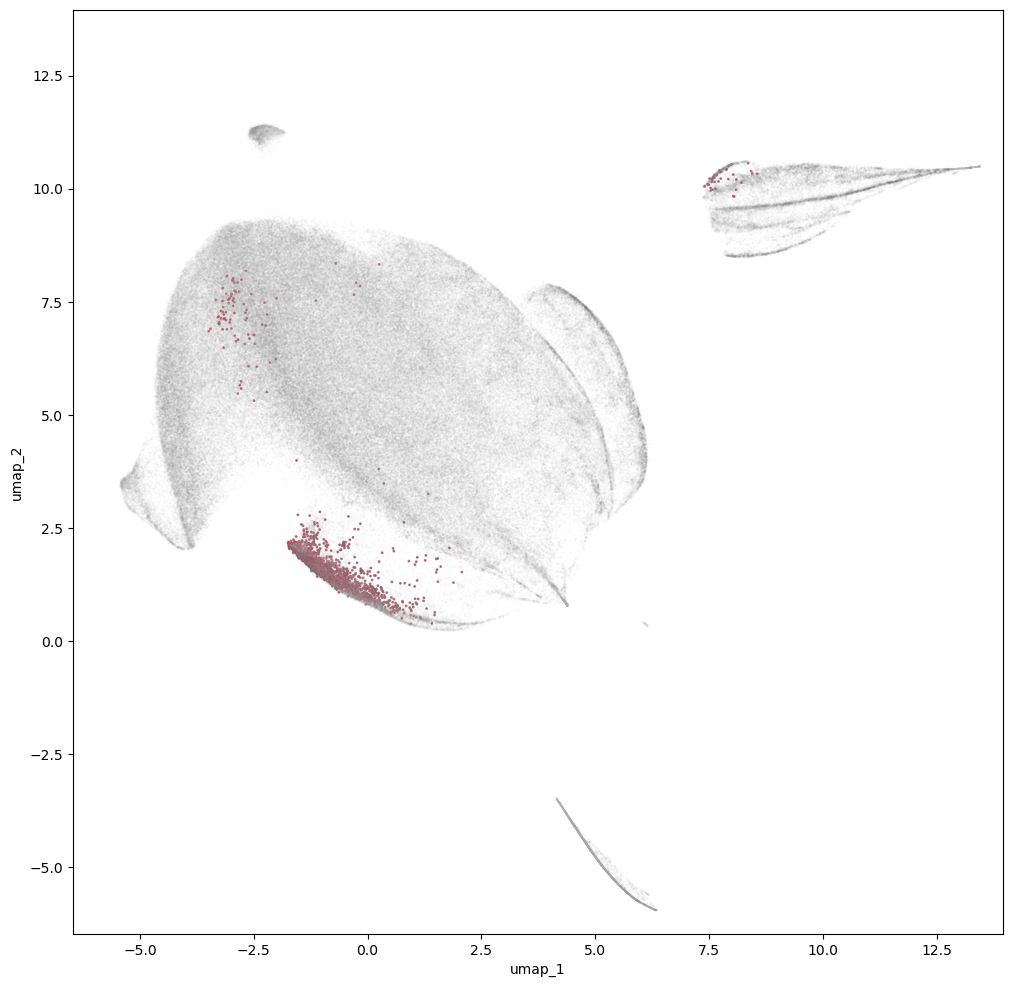

In [5]:
#- Render Scatter Plot
plot_args = {"x": "umap_1",
             "y": "umap_2",
             "c": "color",
             "alpha": 0.8,
             "s": "size"}
plt.rcParams['figure.figsize'] = [12, 12]
ax = df.plot.scatter(**plot_args)
minax = min(df.umap_1.min(), df.umap_2.min()) - 0.5
maxax = max(df.umap_1.max(), df.umap_2.max()) + 0.5
ax.set_xlim(minax,maxax)
ax.set_ylim(minax,maxax)
ax

## Rendering Clinical Text

In [ ]:
#- 
NOTEIDX = 0
print(df.iloc[NOTEIDX])
display(Markdown(df.iloc[NOTEIDX].text))

In [ ]:
#- 
NOTEIDX = 2
print(df.iloc[NOTEIDX])
display(Markdown(df.iloc[NOTEIDX].text))